In [51]:
 from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
pip install numpy scipy

In [53]:
pip install bangla

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re,json,nltk
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from tensorflow.keras.preprocessing.text import Tokenizer

In [55]:
# general library
import numpy as np
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt
import os
import bangla
import io
import string
%matplotlib inline
#import Wordcloud

# nlp packages
import nltk
# import bnltk
import regex
from nltk import word_tokenize
from collections import Counter
# from bltk.langtools import Tokenizer
# from bnltk.tokenize import Tokenizers
#from wordcloud import WordCloud

#modeling packages
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score ,log_loss
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import matthews_corrcoef
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_predict
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from numpy import mean
from numpy import std
from sklearn import metrics
from sklearn import tree
import time
import warnings
warnings.filterwarnings("ignore")
from os import path
from PIL import Image

#Machine learning model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.neural_network import MLPClassifier

#Deep learning library
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import Dense, Dropout, Embedding, GRU, LSTM, RNN, SpatialDropout1D
# from tensorflow.keras.layers import Dense
from keras.preprocessing.text import Tokenizer

In [56]:
data_set = pd.read_csv("/content/drive/MyDrive/Thesis Final/0.Dataset/1.Health_dataset final.csv")
data_set

,Serial,Data,Label
0,1,এইডস আমাদের দেশে প্রকট নয়। তারপরও সাবধানতা অবল...,REAL
1,2,এইডস সংক্রমিতদের মধ্যে রয়েছেন নারী ও পুরুষ যৌন...,REAL
2,3,যারা সহজেই সর্দিতে আক্রান্ত হয় (বিশেষ করে শিশু...,REAL
3,4,"কোকাকোলা, পেপসি, স্প্রাইট ইত্যাদি কোমল পানীয় ন...",REAL
4,5,শরীরের কোন অংশ যদি পুড়ে যায় তাহলে তুলসীর রস এব...,FAKE
...,...,...,...
5033,5034,"পিঠ, ঘাড়, নিতম্বে বিরুপ প্রভাব ফেলে মোটা বা বে...",REAL
5034,5035,মোটা মানিব্যাগ শারীরিক ভারসাম্য নষ্ট করে।,REAL
5035,5036,মোটা মানিব্যাগ পকেটে থাকা অবস্থায় বসে থাকার অভ...,REAL
5036,5037,মোটা মানিব্যাগে ওপর বসে থাকলে শিরদাঁড়ায়ও চাপ পড়ে।,REAL


In [57]:
# Calculate and display summary statistics for each dataset
# Show statistics of the dataset
statistics = data_set.describe()

# Display the statistics
print(statistics)

            Serial
count  5038.000000
mean   2519.500000
std    1454.489658
min       1.000000
25%    1260.250000
50%    2519.500000
75%    3778.750000
max    5038.000000


In [58]:
data_set = data_set.drop(columns=['Serial'])

print("Dataset after dropping 'Serial' column:")
print(data_set)

Dataset after dropping 'Serial' column:
                                                   Data Label
0     এইডস আমাদের দেশে প্রকট নয়। তারপরও সাবধানতা অবল...  REAL
1     এইডস সংক্রমিতদের মধ্যে রয়েছেন নারী ও পুরুষ যৌন...  REAL
2     যারা সহজেই সর্দিতে আক্রান্ত হয় (বিশেষ করে শিশু...  REAL
3     কোকাকোলা, পেপসি, স্প্রাইট ইত্যাদি কোমল পানীয় ন...  REAL
4     শরীরের কোন অংশ যদি পুড়ে যায় তাহলে তুলসীর রস এব...  FAKE
...                                                 ...   ...
5033  পিঠ, ঘাড়, নিতম্বে বিরুপ প্রভাব ফেলে মোটা বা বে...  REAL
5034          মোটা মানিব্যাগ শারীরিক ভারসাম্য নষ্ট করে।  REAL
5035  মোটা মানিব্যাগ পকেটে থাকা অবস্থায় বসে থাকার অভ...  REAL
5036  মোটা মানিব্যাগে ওপর বসে থাকলে শিরদাঁড়ায়ও চাপ পড়ে।  REAL
5037   মোটা মানিব্যাগের কারণে নানা স্নায়ুর সমস্যাও দ...  REAL

[5038 rows x 2 columns]


In [59]:

print(data_set)

                                                   Data Label
0     এইডস আমাদের দেশে প্রকট নয়। তারপরও সাবধানতা অবল...  REAL
1     এইডস সংক্রমিতদের মধ্যে রয়েছেন নারী ও পুরুষ যৌন...  REAL
2     যারা সহজেই সর্দিতে আক্রান্ত হয় (বিশেষ করে শিশু...  REAL
3     কোকাকোলা, পেপসি, স্প্রাইট ইত্যাদি কোমল পানীয় ন...  REAL
4     শরীরের কোন অংশ যদি পুড়ে যায় তাহলে তুলসীর রস এব...  FAKE
...                                                 ...   ...
5033  পিঠ, ঘাড়, নিতম্বে বিরুপ প্রভাব ফেলে মোটা বা বে...  REAL
5034          মোটা মানিব্যাগ শারীরিক ভারসাম্য নষ্ট করে।  REAL
5035  মোটা মানিব্যাগ পকেটে থাকা অবস্থায় বসে থাকার অভ...  REAL
5036  মোটা মানিব্যাগে ওপর বসে থাকলে শিরদাঁড়ায়ও চাপ পড়ে।  REAL
5037   মোটা মানিব্যাগের কারণে নানা স্নায়ুর সমস্যাও দ...  REAL

[5038 rows x 2 columns]


In [60]:


# Count total data points in the dataset
total_data_points = len(data_set)

# Count the number of occurrences of each label
label_counts = data_set['Label'].value_counts()

# Display the results
print(f"Total data points in the dataset: {total_data_points}")
print("Label counts:")
print(label_counts)

Total data points in the dataset: 5038
Label counts:
FAKE    2554
REAL    2484
Name: Label, dtype: int64


In [61]:
# Calculate and display summary statistics for each dataset
# Show statistics of the dataset
statistics = data_set.describe()

# Display the statistics
print(statistics)

                                                     Data Label
count                                                5038  5038
unique                                               2483     2
top     গাজরের ভিটামিন ও মিনারেলস দেহের রোগ প্রতিরোধ ক...  FAKE
freq                                                    4  2554


In [62]:
missing_values = data_set.isnull().sum()

# Display the results
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Data     0
Label    0
dtype: int64


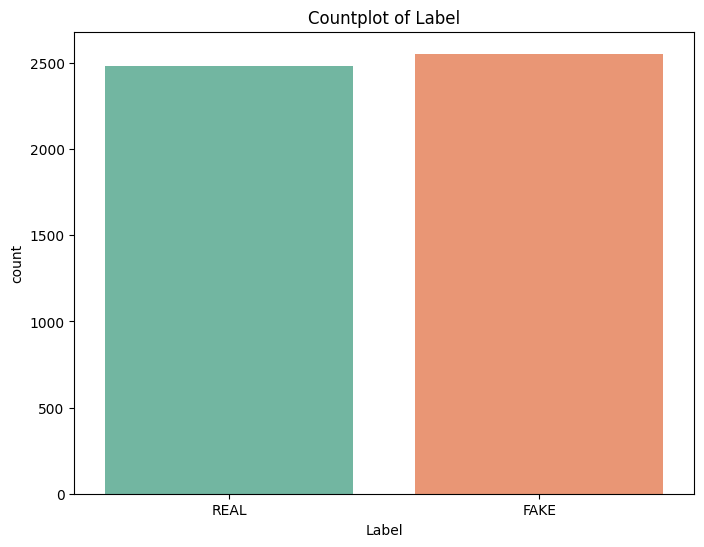

In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot for categorical 'Label' column
plt.figure(figsize=(8, 6))
sns.countplot(x='Label', data=data_set, palette='Set2')
plt.title("Countplot of Label")
plt.show()





WordCloud

In [65]:
!pip install ydata-profiling

In [67]:
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport

In [68]:
profile = ProfileReport(data_set, title="Profiling Report")

In [69]:
profile.to_file("your_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]